In [1]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python obect to disk
import pickle

In [4]:
df = pd.read_csv(r'C:\Users\ivaru\OneDrive\Documents\mini project\finalstraw.csv')
df.head()

,Voltage,Current,Temperature,Capacity,WhAccu
0,4.18177,-0.04342,38.38286,0.00000,0.00000
1,4.18110,-0.08173,38.38286,0.00000,-0.00001
2,4.18076,-0.09195,38.38286,0.00000,-0.00002
3,4.18059,-0.09450,38.38286,-0.00001,-0.00003
4,4.18059,-0.09450,38.38286,-0.00001,-0.00004


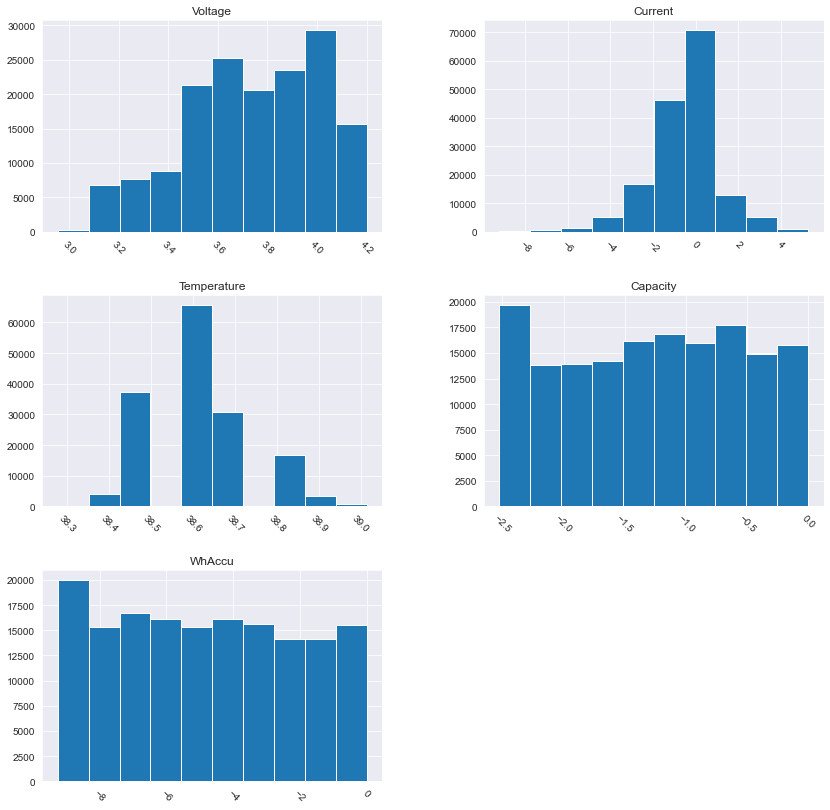

In [5]:
df.hist(figsize=(14,14), xrot=-45)
plt.show()

In [6]:
df.describe()

,Voltage,Current,Temperature,Capacity,WhAccu
count,158956.000000,158956.000000,158956.000000,158956.000000,158956.000000
mean,3.741703,-0.573222,38.614646,-1.272312,-4.844009
std,0.266815,1.534834,0.114929,0.745698,2.731999
min,2.953820,-9.212600,38.277710,-2.525510,-9.252850
25%,3.553050,-1.346010,38.488020,-1.917650,-7.240932
50%,3.762900,-0.296270,38.593180,-1.243975,-4.836045
75%,3.982670,0.000000,38.698340,-0.608240,-2.425105
max,4.199950,5.271690,39.013820,0.000000,0.000000


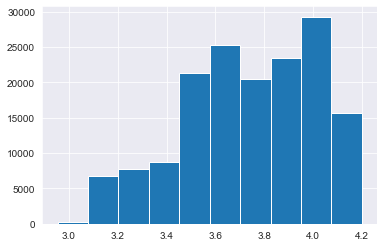

In [7]:
df.Voltage.hist()
plt.show()

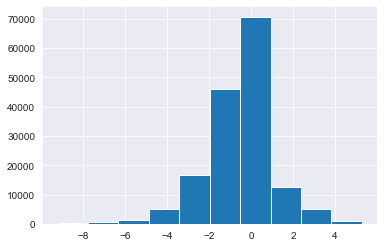

In [8]:
df.Current.hist()
plt.show()

In [9]:
df.shape

(158956, 5)

C:\Users\ivaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


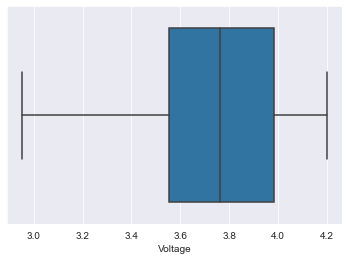

In [12]:
sns.boxplot(df.Voltage)
plt.show()

C:\Users\ivaru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


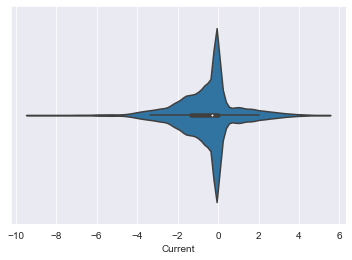

In [13]:
sns.violinplot('Current', data=df)
plt.show()

In [14]:
correlations = df.corr()
correlations

,Voltage,Current,Temperature,Capacity,WhAccu
Voltage,1.000000,0.109116,-0.580774,0.982881,0.979220
Current,0.109116,1.000000,0.027499,-0.004748,-0.004065
Temperature,-0.580774,0.027499,1.000000,-0.576628,-0.571100
Capacity,0.982881,-0.004748,-0.576628,1.000000,0.999510
WhAccu,0.979220,-0.004065,-0.571100,0.999510,1.000000


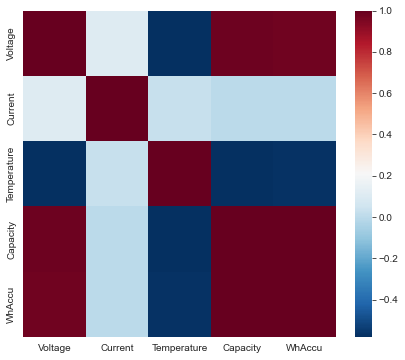

In [15]:
plt.figure(figsize=(7,6))
sns.heatmap(correlations, cmap='RdBu_r')
plt.show()

In [16]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(158956, 5)
(152882, 5)


In [17]:
Vavg_num = 100
V = []
V[:Vavg_num] = df.Voltage[:Vavg_num]
for i in range(Vavg_num,len(df.Voltage)):
    V.append(np.mean(df.Voltage[i-Vavg_num:i]))
df['Vmean'] = V
df.tail()

C:\Users\ivaru\AppData\Local\Temp/ipykernel_12436/3334085476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vmean'] = V


,Voltage,Current,Temperature,Capacity,WhAccu,Vmean
158753,3.20289,0.0,38.59318,-2.52551,-9.25285,3.196544
158824,3.20289,0.0,38.69834,-2.52551,-9.25285,3.196672
158832,3.20306,0.0,38.69834,-2.52551,-9.25285,3.196801
158868,3.20306,0.0,38.59318,-2.52551,-9.25285,3.196930
158914,3.20323,0.0,38.59318,-2.52551,-9.25285,3.197058


In [19]:
df['Temperature'] = df['Temperature'].astype(float)
df['Voltage'] = df['Voltage'].astype(float)
df['Current'] = df['Current'].astype(float)
y = df.Capacity
X = df.drop('WhAccu', axis=1)

C:\Users\ivaru\AppData\Local\Temp/ipykernel_12436/3106569267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temperature'] = df['Temperature'].astype(float)
C:\Users\ivaru\AppData\Local\Temp/ipykernel_12436/3106569267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Voltage'] = df['Voltage'].astype(float)
C:\Users\ivaru\AppData\Local\Temp/ipykernel_12436/3106569267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)) ,
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
}

In [21]:
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
mlp <class 'sklearn.pipeline.Pipeline'>


In [22]:
MLPRegressor()

MLPRegressor()

In [23]:
lasso_hyperparameters = { 
    'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [10, 20],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [10, 20],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

# MLP hyperparameters
mlp_hyperparameters = {
    'mlpregressor__hidden_layer_sizes': [(100,)],
    'mlpregressor__activation': ['logistic', 'relu']
}

# Create hyperparameters dictionary
hyperparameters = {
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'mlp': mlp_hyperparameters
}

In [24]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso', 'mlp']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.
mlp was found in hyperparameters, and it is a grid.


In [25]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.
mlp has been fitted.


In [26]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

lasso
R2: 0.9999999289682573
MAE: 0.00014955515829673008
ridge
R2: 1.0
MAE: 3.3369535010079407e-09
enet
R2: 0.99999990969151
MAE: 0.00016602149509862893
rf
R2: 0.9999999985128755
MAE: 1.2669915295858769e-05
gb
R2: 0.9998558031393681
MAE: 0.007381607384783767
mlp
R2: 0.9999733648302994
MAE: 0.0027760359084159332


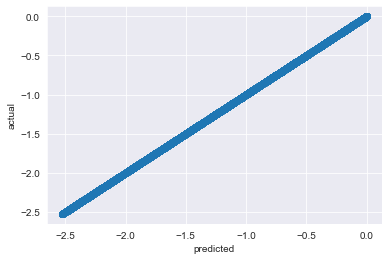

In [27]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
plt.ylabel('actual')
plt.show()



In [28]:
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=20, random_state=123))])

In [29]:
with open('RF_SOC_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)